In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...


## initialize

In [3]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 6
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.5

## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1]


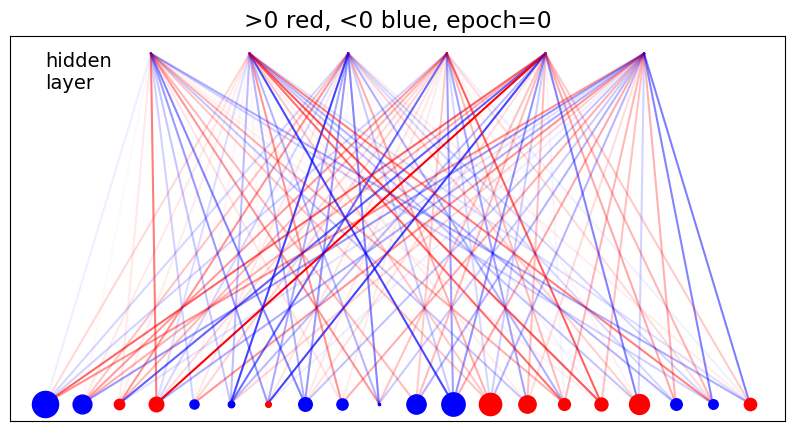

In [4]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=400.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [5]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

def activate_block(h,wei_block,a_block,DE): #structure perserving activate function
    
    
    thai = np.zeros(4)
        
    for j in range(len(thai)):
            
        thai[j] = np.dot(h, wei_block[j]) + a_block[j]
        
    
            
    B_gamma = np.exp(thai)
    
    P_gamma = B_gamma/np.sum(B_gamma)

    r = np.random.random()
    p_array = np.append([0] , np.cumsum(P_gamma))
    p = 0
    
    for i in range(len(P_gamma)):
        
        if r > p_array[i] and r < p_array[i+1]:
            
            p = i
            
    v_out = np.array([0 ,0 , 0 ,0])
    
    v_out[p] = 1
    
    return v_out

def activate_sp(h,wei,a,DE):
    
    v_out = np.full(20, vmin, dtype=int)
    
    for i in range(5):
        
        v_out[i * 4:(i+1) * 4] = activate_block(h,wei[i * 4:(i+1) * 4],a[i * 4:(i+1) * 4],DE)
        
    return v_out
    
    

k = 1000
h = activate(v[k],w,b,GAP,info=False)

vf = activate_sp(h,w,a,GAP)

hf = activate(vf,w,b,GAP)


In [6]:
def energy(v_data , h_data , w , a , b ):
    
    E = - np.dot(a , v_data) + 0.5 * np.dot(h_data , h_data) - np.dot(np.dot(v_data , w) , h_data)
    
    return E

h = activate(v[k],w,b,GAP,info=False)
E = energy(v[k] , h , w , a , b )

def partition(w , a , b):
    
    z = 0
    
    blocks = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
    
    block_combs = [[v1,v2,v3,v4,v5] for v1 in blocks for v2 in blocks for v3 in blocks for v4 in blocks for v5 in blocks]
    model_hs = [[h1,h2,h3,h4,h5,h6] for h1 in [-1,1] for h2 in [0,1] for h3 in [0,1] for h4 in [0,1] for h5 in [0,1] for h6 in [0,1]]
    model_vs = np.reshape(block_combs , (4 ** 5 , 20))
    
    for v in model_vs:
        for h in model_hs:
            
            z += np.exp(-energy(v , h , w , a , b))
            
    
    return z

## RBM train


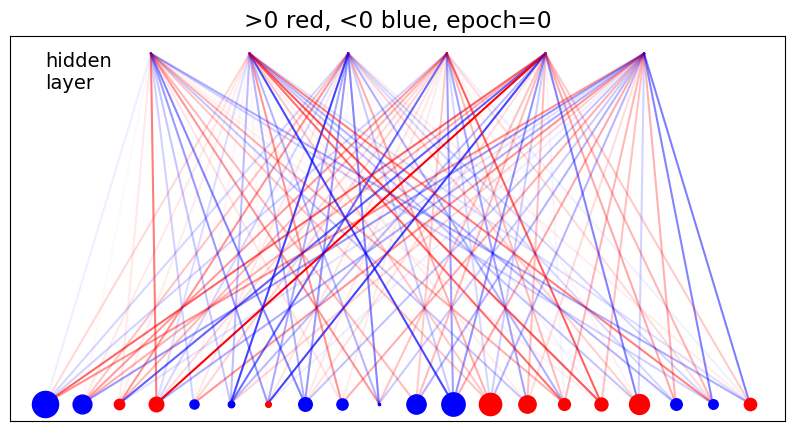

----------- epoch = 0   k= 9   m= 10
dw = [[ 0.1  0.1  0.   0.   0.   0. ]
 [ 0.1 -0.1  0.1  0.1  0.  -0.1]
 [ 0.1  0.1  0.1  0.  -0.1  0.2]
 [-0.4 -0.3 -0.1 -0.1  0.  -0.2]
 [-0.2 -0.2  0.  -0.1 -0.1 -0.1]
 [ 0.1  0.   0.   0.2  0.   0.1]
 [ 0.1  0.2  0.  -0.1  0.   0. ]
 [-0.1 -0.2  0.1  0.   0.  -0.1]
 [-0.3 -0.2 -0.2 -0.1 -0.2 -0.3]
 [ 0.  -0.1  0.  -0.1 -0.1  0. ]
 [ 0.1  0.   0.1  0.2  0.2 -0.1]
 [ 0.1  0.1  0.2  0.   0.   0.3]
 [-0.1 -0.1 -0.1 -0.1 -0.1  0. ]
 [ 0.1  0.2  0.2  0.3  0.   0.1]
 [ 0.   0.   0.1 -0.1  0.   0. ]
 [-0.1 -0.3 -0.1 -0.1  0.  -0.2]
 [ 0.1 -0.1 -0.1 -0.2  0.  -0.3]
 [ 0.   0.   0.   0.  -0.1  0.1]
 [-0.1 -0.1  0.1  0.2  0.1 -0.1]
 [-0.1  0.   0.1  0.  -0.1  0.2]]
da = [ 0.1  0.   0.3 -0.4 -0.2  0.2  0.1 -0.1 -0.5  0.   0.2  0.3 -0.1  0.4
  0.  -0.3 -0.2  0.1  0.   0.1]
db = [-0.1 -0.2  0.1  0.  -0.1 -0.1]
----------- epoch = 1   k= 9   m= 10
dw = [[ 0.1  0.   0.2  0.1  0.2  0.1]
 [ 0.   0.1 -0.1  0.1  0.   0.1]
 [-0.2 -0.1  0.1 -0.4  0.  -0.2]
 [ 0.   0.1

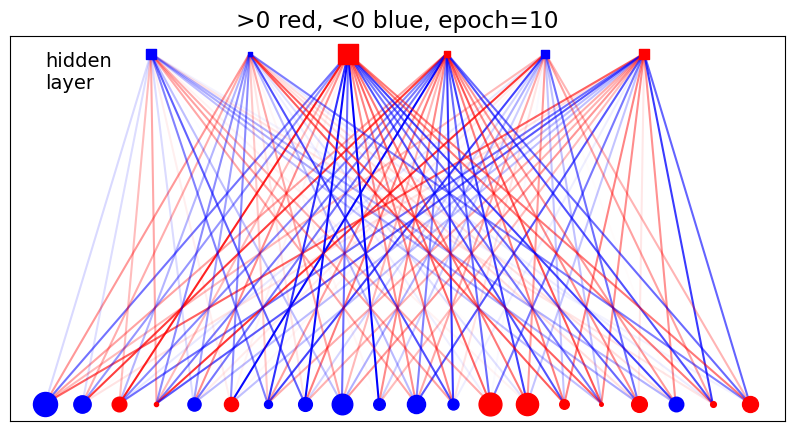

l_rate =  0.0009999000099990003


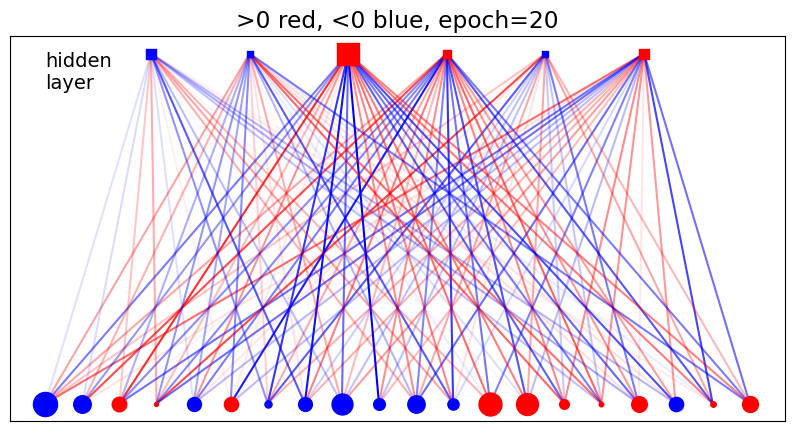

l_rate =  0.000999800039992002


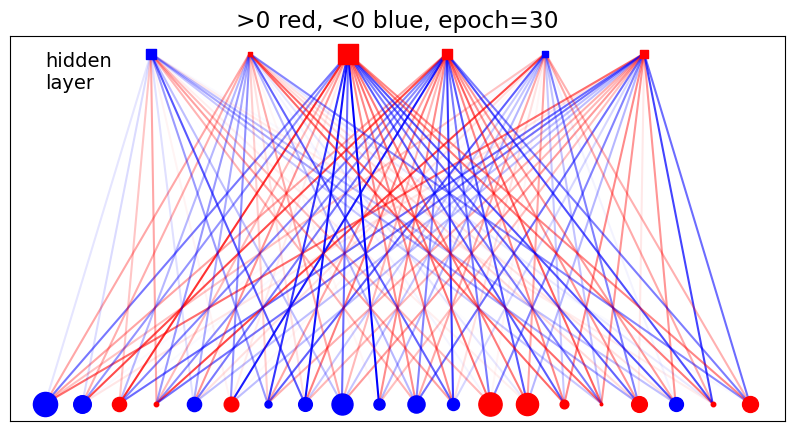

l_rate =  0.0009997000899730085


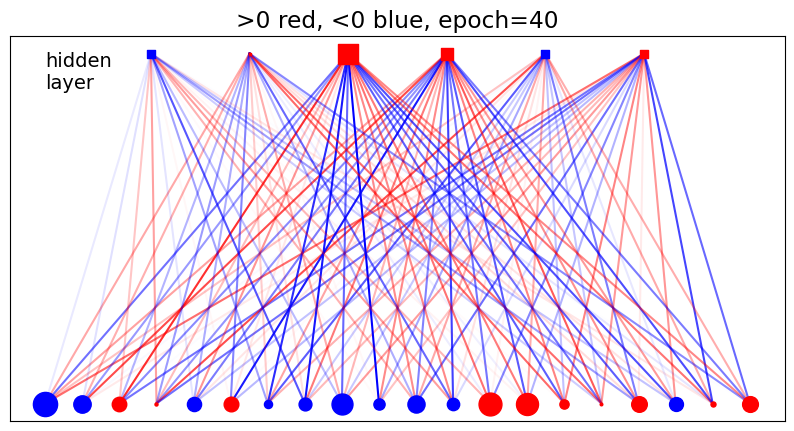

l_rate =  0.000999600159936026


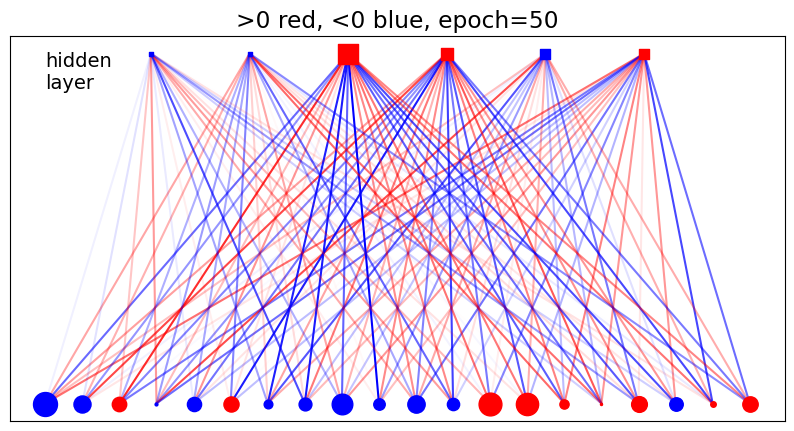

l_rate =  0.0009995002498750633


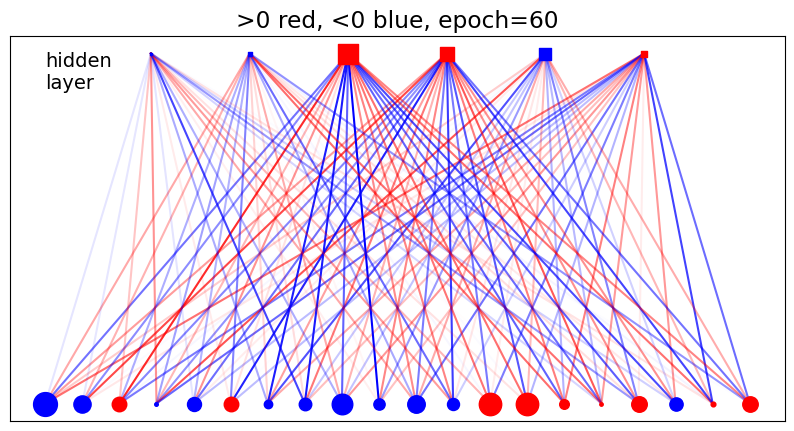

l_rate =  0.0009994003597841301


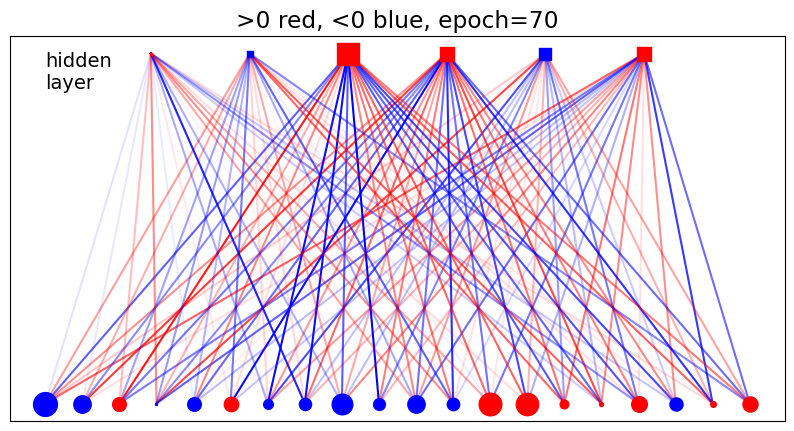

l_rate =  0.0009993004896572404


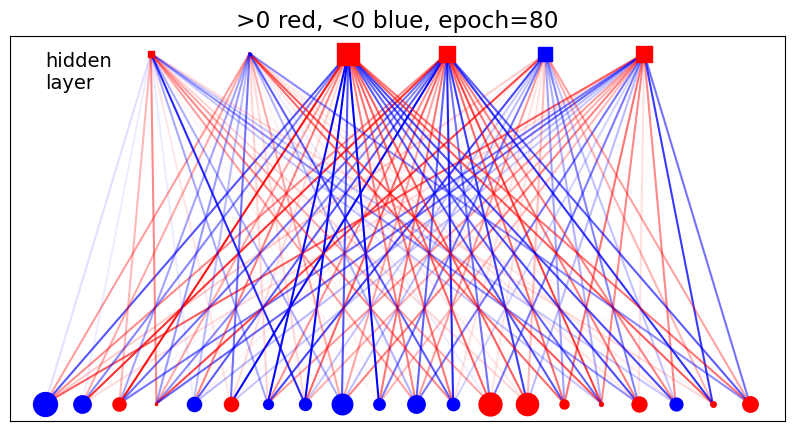

l_rate =  0.0009992006394884097


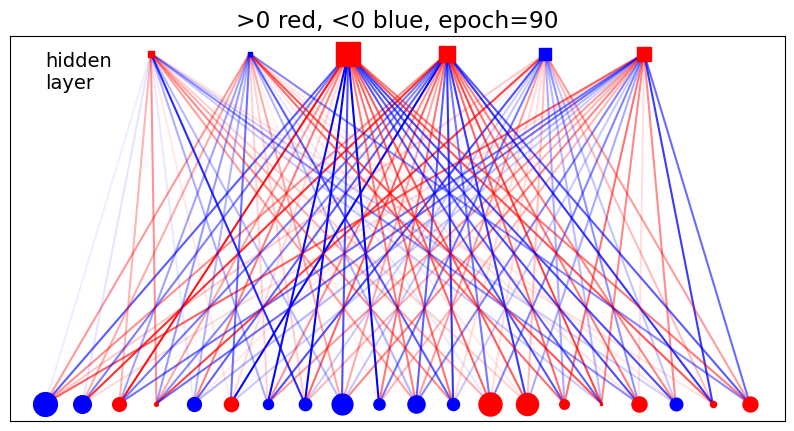

l_rate =  0.000999100809271656


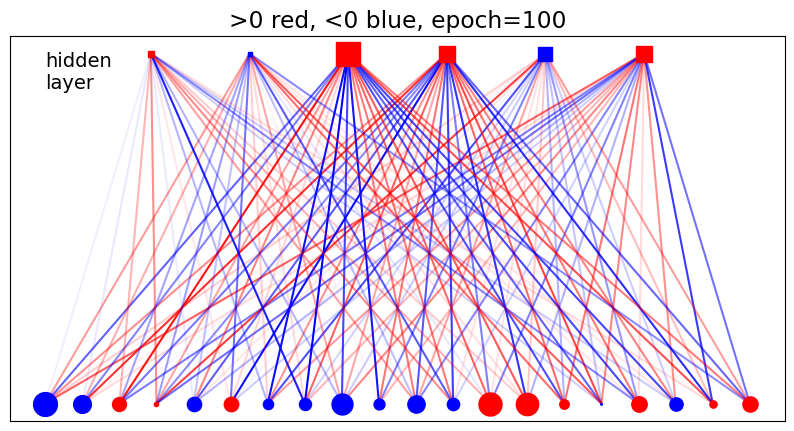

l_rate =  0.000999000999000999


In [7]:
# random seed for reproducibility
np.random.seed(12345)
E_list = np.zeros(100)
Z_list = np.zeros(100)

plotgraph(0)

# learning rate
l_rate = 10 ** -3

#memory lifetime of the first and second moment in the ADAM SGD steps
beta1 = 0.9
beta2 = 0.99

# regularization constant
epsilon = 10 ** -8

# minibatch
mini, m = 10, 0

# train model
print('===================================================')
for epoch in range(100):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    E = 0
    for k in range(N):
        if m==0:
            
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))
        

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        # negative CD phase: generating fantasy vf
        vf = activate_sp(h,w,a,GAP)
        # one more positive CD phase: generating fantasy h from fantasy vf 
        hf = activate(vf,w,b,GAP)
        # second CD: generate fantasy v for the second time
        vf = activate_sp(h,w,a,GAP)
        # second CD: generate fantasy h for the second time
        hf = activate(vf,w,b,GAP)

        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
        E += energy(v[k] , h , w , a , b)
    
        m += 1
        # minibatch
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a "RMSprop" SGD
            dw = (vh_data - vh_model) / mini
            da = (v_data - v_model) / mini
            db = (h_data - h_model) / mini
            if epoch<=1 and k<=mini:
                print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                print('dw =',dw)
                print('da =',da)
                print('db =',db)
                
            if k<=mini:
                
                m_w = dw 
                m_a = da 
                m_b = db 
                
                s_w = dw ** 2
                s_a = da ** 2
                s_b = db ** 2
                
            else: 
            # basic step of RMSprop gradient descent
            
                m_w = beta1 * m_w + (1-beta1) * dw 
                m_a = beta1 * m_a + (1-beta1) * da
                m_b = beta1 * m_b + (1-beta1) * db
            
                s_w = beta2 * s_w + (1-beta2) * dw ** 2
                s_a = beta2 * s_a + (1-beta2) * da ** 2
                s_b = beta2 * s_b + (1-beta2) * db ** 2
                
            m_w_hat = m_w/(1 - beta1**m)
            m_a_hat = m_a/(1 - beta1**m)
            m_b_hat = m_b/(1 - beta1**m)
                
            s_w_hat = s_w/(1 - beta2**m)
            s_a_hat = s_a/(1 - beta2**m)
            s_b_hat = s_b/(1 - beta2**m)
                
            
            w = w + l_rate * m_w_hat/(np.sqrt(s_w_hat)  + epsilon)
            a = a + l_rate * m_a_hat/(np.sqrt(s_a_hat)  + epsilon)
            b = b + l_rate * m_b_hat/(np.sqrt(s_b_hat)  + epsilon)
            
            m=0
    
    E_list[epoch] =  E/N
    Z_list[epoch] =  partition(w , a , b)
    
    # randomize the order of input data
    np.random.shuffle(v)
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)
        print('l_rate = ',l_rate)

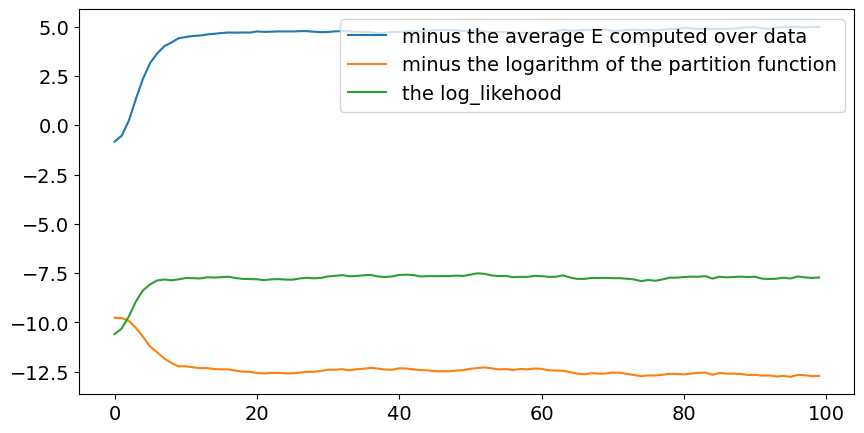

In [8]:
fig, ax = plt.subplots(1,1,figsize = (10,5))

ax.plot(np.arange(100), -E_list , label = 'minus the average E computed over data')
ax.plot(np.arange(100), - np.log(Z_list) , label = 'minus the logarithm of the partition function')
ax.plot(np.arange(100), -E_list - np.log(Z_list) , label = 'the log_likehood')
ax.legend(loc = 'upper right')

In [9]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)

w0= [[-8.02929500e-02  1.87857033e-01 -2.03740626e-01 -2.17975359e-01
   7.71042577e-01  5.46538733e-01]
 [ 3.64414674e-02  1.10509933e-01  3.01635468e-01  4.88891926e-01
   3.95052168e-01 -5.08419748e-01]
 [ 1.07860593e-01  8.97870182e-02  5.30657642e-01  3.47686193e-01
  -7.85106746e-01 -1.45848643e-01]
 [ 6.54645586e-01 -1.72021203e-01 -2.11704013e-01  1.87088914e-01
   1.27434065e+00 -4.00558390e-01]
 [-2.26352263e-01  4.86843697e-02  1.18694804e-01  2.05440307e-01
   3.68807287e-04  5.27085566e-01]
 [-2.79874977e-01 -3.26005239e-01 -9.29681343e-01 -7.29850429e-01
  -3.37616829e-01  2.19707060e-01]
 [-4.96540360e-01  4.70000651e-02 -4.17143902e-01  1.30567343e-01
  -9.25440195e-01 -7.82671864e-02]
 [-6.04820407e-01 -3.80753951e-01 -5.12659443e-01  1.12315611e-01
   1.48257566e-01 -2.95698627e-01]
 [ 1.29940923e-01  5.29412453e-01  2.74078923e-02  9.67535462e-02
  -4.65250272e-03  3.94119531e-01]
 [ 5.20568556e-01 -3.60564048e-01 -6.07609535e-01  8.70151550e-03
   2.97454498e-01 -2.

## Test: noise reduction

In [10]:
from IPython.display import display_html 
import pandas as pd

ampl=40.

# original, non-reshuffled data in v0
v1 = np.zeros_like(v0)
for k in range(N):
    # positive CD phase: generating h 
    h = activate(v0[k],w,b,ampl*GAP)
    # negative CD phase: generating fantasy vf with low T == large GAP
    v1[k] = activate_sp(h,w,a,GAP)
# difference between fantasy and data
diff = (v1 - v0)/2
str0 = fname+'_M'+str(M)+'-mini'+str(mini)
np.savetxt(str0+".fantasy", (v1+1)/2, fmt='%d',delimiter=' ')  
np.savetxt(str0+'.diff', diff, fmt='%d',delimiter=' ')  


def is_one(cell_value):
    color0 = 'background-color: gray; color: white'
    color1 = 'background-color: gold;'
    if type(cell_value) in [float, int]:
        if cell_value == 1:
            return color1
    return color0

N1=50
df0 = pd.DataFrame(v0[:N1])
df1 = pd.DataFrame(((v1[:N1]-vmin)/(1-vmin)).astype(int))

df0s = df0.style.set_table_attributes("style='display:inline'")
df1s = df1.style.set_table_attributes("style='display:inline'")
df0s.applymap(is_one)
df1s.applymap(is_one)
sty = [dict(selector="caption",props=[("font-size", "150%")])]
df0s.set_caption('Original').set_table_styles(sty)
df1s.set_caption('Denoised').set_table_styles(sty)

display_html(df0s._repr_html_()+df1s._repr_html_(), raw=True)

Original 
 
 
   
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 13 
 14 
 15 
 16 
 17 
 18 
 19 
 
 
 
 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 1 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 3 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 6 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 8 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 10 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 11 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 12 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 13 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 14 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 15 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 16 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 17 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 18 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 19 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 20 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 21 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 22 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 23 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 24 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 25 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 
 
 26 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 27 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 28 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 29 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 30 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 31 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 32 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 33 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 
 
 34 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 35 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 
 
 36 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 37 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 38 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 39 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 
 
 40 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 
 
 41 
 0 
 0 
 0 
 1 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 
 
 42 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 1 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 
 
 43 
 0 
 1 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 1 
 0 
 0 
 0 
 1 
 0 
 0

In [11]:
a


array([-0.73625145, -0.40956246,  0.25021038,  0.02335333, -0.26545042,
        0.26907624, -0.13631327, -0.18808938, -0.56705318, -0.15511875,
       -0.3857357 , -0.19641751,  0.68835915,  0.64564438,  0.11619151,
       -0.00271492,  0.30947198, -0.22800885,  0.06830249,  0.29980513])

In [12]:
w3 = np.reshape(w[:,2] , (5,6))

ValueError: cannot reshape array of size 20 into shape (5,6)

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(w3, index = ['A', 'B','C','D','E'] , columns = [1,2,3,4,5,6])
df

In [ ]:
sns.set(font_scale=1)
ax = sns.heatmap(df, cmap='coolwarm', vmin=-1, vmax=1, annot=True, linewidths=0.5, fmt=".2f")
ax.set_title("Group 3")
#ax.set_xlabel("Strategie")
#ax.set_ylabel("Strategie")